# Importamos y combinamos los datos

In [32]:
import pandas as pd
import re
import string
import numpy as np
import sys
sys.path.append('../')
import funciones as fn
import codecs
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import matplotlib.colors as mcolors

In [11]:
df = pd.read_excel("E:/Base bonita/Base_informe_semana.xlsx")
xenofobia = fn.limpieza_base(df)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
more_cols = list()
for line in pruebas.readlines():
    more_cols.append(line.strip())
del_cols = del_cols + more_cols
print(del_cols)
xenofobia = xenofobia.drop(del_cols, axis=1)
for col in xenofobia.columns: 
    print(col)
xenofobia.head(11)

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


['Query_Name', 'Url', 'Page_Type', 'Language', 'Country_Code', 'Continent', 'Continent_Code', 'Country', 'Added', 'Assignment', 'Avatar', 'Category_Details', 'Checked', 'Display_URLs', 'Expanded_URLs', 'Facebook_Author_ID', 'Facebook_Comments', 'Facebook_Likes', 'Facebook_Role', 'Facebook_Shares', 'Facebook_Subtype', 'Full_Text', 'Full_Name', 'Instagram_Comments', 'Instagram_Followers', 'Instagram_Following', 'Instagram_Likes', 'Instagram_Interactions_Count', 'Instagram_Posts', 'Last_Assignment_Date', 'Latitude', 'Location_Name', 'Longitude', 'Media_Filter', 'Media_URLs', 'Original_Url', 'Priority', 'Short_URLs', 'Resource_Id', 'Starred', 'Status', 'Subtype', 'Thread_Created_Date', 'Thread_Id', 'Thread_URL', 'Twitter_Author_ID', 'Twitter_Channel_Role', 'Twitter_Reply_to', 'Twitter_Retweet_of', 'Updated', 'Blog_Name', 'Copyright', 'Item_Review', 'Page_Type_Name', 'Linkedin_Comments', 'Linkedin_Engagement', 'Linkedin_Impressions', 'Linkedin_Likes', 'Linkedin_Shares', 'Linkedin_Sponsored'

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categoría_Barometro_v3_-_Xenofobia_,Categoría_Barometro_v4_-_Denuncia_Xenofobia,Categoría_Barometro_v4_-_Xenofobia,Categorías_prueba_-_Denuncia,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
0,2021-03-25 23:59:52.0,RT @pulzo 3.000 venezolanos cruzan frontera pa...,twitter.com,neutral,COL.Bogota.Bogota,individual,piratamorgann,Bogota,female,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
1,2021-03-25 23:59:14.0,@FreeWordColombi Parecería que la pensionada d...,twitter.com,negative,COL.Bogota.Bogota,individual,Javierey5,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
2,2021-03-25 23:59:12.0,@ShirlyGacettis @andavila197926 @MariaFdaCabal...,twitter.com,neutral,COL.Valle del Cauca.Cali,individual,Nohablemospaja,Cali,male,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
3,2021-03-25 23:58:19.0,RT @Kimosab56580835 Hace un año escribí esto y...,twitter.com,negative,COL.Santander.Socorro,individual,FabioVe04540432,Socorro,male,NaN,...,X,NaN,NaN,NaN,NaN,X,X,NaN,X,X
4,2021-03-25 23:58:00.0,RT @vicpiedra #PlusUltra Los últimos datos del...,twitter.com,neutral,COL.Antioquia.Medellin,individual,JuanGGomez,Medellin,male,#plusultra,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
5,2021-03-25 23:57:20.0,RT @PesosSigno #SignoPesos Nuestros temas a la...,twitter.com,neutral,COL.Bogota.Bogota,individual,henrygonzalez30,Bogota,male,#signopesos,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
6,2021-03-25 23:57:17.0,"RT @guayaquilfox Mi amigo el Uber , la pasamos...",twitter.com,neutral,COL.Antioquia.Medellin,individual,dannif2,Medellin,male,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
7,2021-03-25 23:56:37.0,@Bogota aún piensan que los inmigrantes venezo...,twitter.com,neutral,COL.Bogota.Bogota,individual,ALBER_CRUZ,Bogota,male,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X
8,2021-03-25 23:54:52.0,@Joselitomocoso3 Jajajajajaj llega un veneca y...,twitter.com,negative,COL.Bogota.Bogota,individual,Javierey5,Bogota,unknown,NaN,...,X,NaN,NaN,NaN,NaN,X,X,NaN,X,X
9,2021-03-25 23:53:20.0,Que pensaran esos Venezolanos que están roband...,twitter.com,neutral,COL.Bogota.Bogota,individual,marianyelarami4,Bogota,female,NaN,...,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X


In [12]:
xenofobia['Clean_text']= xenofobia['Snippet'].replace(r'(.)\1+', r'\1\1', regex=True).str.strip()
xenofobia['Clean_text']= xenofobia['Clean_text'].replace('\s+', ' ', regex=True).str.strip()
xenofobia['Clean_text']= xenofobia['Clean_text'].replace(r"http\S+", '', regex=True)
xenofobia['Clean_text']= xenofobia['Clean_text'].astype(str)
xenofobia_WRT = xenofobia
xenofobia = xenofobia[~xenofobia['Clean_text'].str.startswith('RT')]
xenofobia

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categoría_Barometro_v4_-_Denuncia_Xenofobia,Categoría_Barometro_v4_-_Xenofobia,Categorías_prueba_-_Denuncia,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia,Clean_text
1,2021-03-25 23:59:14.0,@FreeWordColombi Parecería que la pensionada d...,twitter.com,negative,COL.Bogota.Bogota,individual,Javierey5,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@FreeWordColombi Parecería que la pensionada d...
2,2021-03-25 23:59:12.0,@ShirlyGacettis @andavila197926 @MariaFdaCabal...,twitter.com,neutral,COL.Valle del Cauca.Cali,individual,Nohablemospaja,Cali,male,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@ShirlyGacettis @andavila197926 @MariaFdaCabal...
7,2021-03-25 23:56:37.0,@Bogota aún piensan que los inmigrantes venezo...,twitter.com,neutral,COL.Bogota.Bogota,individual,ALBER_CRUZ,Bogota,male,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@Bogota aún piensan que los inmigrantes venezo...
8,2021-03-25 23:54:52.0,@Joselitomocoso3 Jajajajajaj llega un veneca y...,twitter.com,negative,COL.Bogota.Bogota,individual,Javierey5,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@Joselitomocoso3 Jajajajajaj llega un veneca y...
9,2021-03-25 23:53:20.0,Que pensaran esos Venezolanos que están roband...,twitter.com,neutral,COL.Bogota.Bogota,individual,marianyelarami4,Bogota,female,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,Que pensaran esos Venezolanos que están roband...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,2021-01-01 00:17:53.0,@OspinaPauce Y nos toca mamarnos”eso”xq si nos...,twitter.com,negative,COL.Atlantico.Barranquilla,individual,JAOS72701634,Barranquilla,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@OspinaPauce Y nos toca mamarnos”eso”xq si nos...
199997,2021-01-01 00:15:55.0,@JoseLCont69 @venezolanoenpie @pedrodegabia De...,twitter.com,negative,COL.Antioquia.Medellin,individual,Mscerveza,Medellin,female,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@JoseLCont69 @venezolanoenpie @pedrodegabia De...
199999,2021-01-01 00:12:19.0,@JoseLCont69 @venezolanoenpie @pedrodegabia Ac...,twitter.com,neutral,COL.Antioquia.Medellin,individual,Mscerveza,Medellin,female,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@JoseLCont69 @venezolanoenpie @pedrodegabia Ac...
200000,2021-01-01 00:12:07.0,@TwiterosCali Hay que prender a candela a esos...,twitter.com,negative,COL.Bogota.Bogota,individual,David10ruiz,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@TwiterosCali Hay que prender a candela a esos...


In [13]:
xenofobia['Date'] =  pd.to_datetime(xenofobia['Date'], infer_datetime_format=True)
xenofobia

<ipython-input-13-3055e7b6a3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xenofobia['Date'] =  pd.to_datetime(xenofobia['Date'], infer_datetime_format=True)


,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categoría_Barometro_v4_-_Denuncia_Xenofobia,Categoría_Barometro_v4_-_Xenofobia,Categorías_prueba_-_Denuncia,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia,Clean_text
1,2021-03-25 23:59:14,@FreeWordColombi Parecería que la pensionada d...,twitter.com,negative,COL.Bogota.Bogota,individual,Javierey5,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@FreeWordColombi Parecería que la pensionada d...
2,2021-03-25 23:59:12,@ShirlyGacettis @andavila197926 @MariaFdaCabal...,twitter.com,neutral,COL.Valle del Cauca.Cali,individual,Nohablemospaja,Cali,male,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@ShirlyGacettis @andavila197926 @MariaFdaCabal...
7,2021-03-25 23:56:37,@Bogota aún piensan que los inmigrantes venezo...,twitter.com,neutral,COL.Bogota.Bogota,individual,ALBER_CRUZ,Bogota,male,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@Bogota aún piensan que los inmigrantes venezo...
8,2021-03-25 23:54:52,@Joselitomocoso3 Jajajajajaj llega un veneca y...,twitter.com,negative,COL.Bogota.Bogota,individual,Javierey5,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@Joselitomocoso3 Jajajajajaj llega un veneca y...
9,2021-03-25 23:53:20,Que pensaran esos Venezolanos que están roband...,twitter.com,neutral,COL.Bogota.Bogota,individual,marianyelarami4,Bogota,female,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,Que pensaran esos Venezolanos que están roband...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,2021-01-01 00:17:53,@OspinaPauce Y nos toca mamarnos”eso”xq si nos...,twitter.com,negative,COL.Atlantico.Barranquilla,individual,JAOS72701634,Barranquilla,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@OspinaPauce Y nos toca mamarnos”eso”xq si nos...
199997,2021-01-01 00:15:55,@JoseLCont69 @venezolanoenpie @pedrodegabia De...,twitter.com,negative,COL.Antioquia.Medellin,individual,Mscerveza,Medellin,female,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@JoseLCont69 @venezolanoenpie @pedrodegabia De...
199999,2021-01-01 00:12:19,@JoseLCont69 @venezolanoenpie @pedrodegabia Ac...,twitter.com,neutral,COL.Antioquia.Medellin,individual,Mscerveza,Medellin,female,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@JoseLCont69 @venezolanoenpie @pedrodegabia Ac...
200000,2021-01-01 00:12:07,@TwiterosCali Hay que prender a candela a esos...,twitter.com,negative,COL.Bogota.Bogota,individual,David10ruiz,Bogota,unknown,NaN,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,@TwiterosCali Hay que prender a candela a esos...


In [14]:
xenofobia.to_excel("Base_limpia_informe_semana_sin_RT.xlsx") 
xenofobia_WRT.to_excel("Base_limpia_informe_semana_con_RT.xlsx") 

In [2]:
xenofobia_WRT = pd.read_excel("Base_limpia_informe_semana_con_RT.xlsx")

In [3]:
base = xenofobia_WRT[xenofobia_WRT['Gender'] != 'unknown']
base

,Unnamed: 0,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Categoría_Barometro_v4_-_Denuncia_Xenofobia,Categoría_Barometro_v4_-_Xenofobia,Categorías_prueba_-_Denuncia,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia,Clean_text
0,0,2021-03-25 23:59:52.0,RT @pulzo 3.000 venezolanos cruzan frontera pa...,twitter.com,neutral,COL.Bogota.Bogota,individual,piratamorgann,Bogota,female,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,RT @pulzo 3.00 venezolanos cruzan frontera par...
2,2,2021-03-25 23:59:12.0,@ShirlyGacettis @andavila197926 @MariaFdaCabal...,twitter.com,neutral,COL.Valle del Cauca.Cali,individual,Nohablemospaja,Cali,male,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@ShirlyGacettis @andavila197926 @MariaFdaCabal...
3,3,2021-03-25 23:58:19.0,RT @Kimosab56580835 Hace un año escribí esto y...,twitter.com,negative,COL.Santander.Socorro,individual,FabioVe04540432,Socorro,male,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,RT @Kimosab56580835 Hace un año escribí esto y...
4,4,2021-03-25 23:58:00.0,RT @vicpiedra #PlusUltra Los últimos datos del...,twitter.com,neutral,COL.Antioquia.Medellin,individual,JuanGGomez,Medellin,male,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,RT @vicpiedra #PlusUltra Los últimos datos del...
5,5,2021-03-25 23:57:20.0,RT @PesosSigno #SignoPesos Nuestros temas a la...,twitter.com,neutral,COL.Bogota.Bogota,individual,henrygonzalez30,Bogota,male,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,RT @PesosSigno #SignoPesos Nuestros temas a la...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199999,199999,2021-01-01 00:12:19.0,@JoseLCont69 @venezolanoenpie @pedrodegabia Ac...,twitter.com,neutral,COL.Antioquia.Medellin,individual,Mscerveza,Medellin,female,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,@JoseLCont69 @venezolanoenpie @pedrodegabia Ac...
200002,200002,2021-01-01 00:09:16.0,RT @OspinaPauce Cali. Av 2 norte entre 24 y 25...,twitter.com,negative,COL.Bogota.Bogota,individual,fepins,Bogota,male,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,RT @OspinaPauce Cali. Av 2 norte entre 24 y 25...
200003,200003,2021-01-01 00:06:52.0,RT @HamonJairo @OspinaPauce Jueputas venecos!!...,twitter.com,negative,COL.Bogota.Bogota,individual,nogogu,Bogota,female,...,NaN,NaN,NaN,NaN,X,X,NaN,X,X,RT @HamonJairo @OspinaPauce Jueputas venecos!!😡😡
200004,200004,2021-01-01 00:06:44.0,RT @venezolanoenpie La pregunta de la semana h...,twitter.com,neutral,COL.Bogota.Bogota,individual,VICTOR_HUGO_C_,Bogota,male,...,NaN,NaN,NaN,NaN,X,X,NaN,NaN,X,RT @venezolanoenpie La pregunta de la semana


In [4]:
marcaciones = list()
marcaciones.extend(("Categoría_Barometro_v3_-_Educación_", "Categoría_Barometro_v3_-_Integración", "Categoría_Barometro_v3_-_Salud_", "Categoría_Barometro_v3_-_Seguridad_", "Categoría_Barometro_v3_-_Trabajo_", "Categoría_Barometro_v3_-_Vivienda_", "Categoría_Barometro_v3_-_Xenofobia_"))
for marcacion in marcaciones:
    msg = base.apply(lambda x : True if x[marcacion] == "X" else False, axis = 1)
    num_rows = len(msg[msg == True].index)
    print("El número de mensajes marcados como " + marcacion + " en la base es : ", num_rows )

El número de mensajes marcados como Categoría_Barometro_v3_-_Educación_ en la base es :  3100
El número de mensajes marcados como Categoría_Barometro_v3_-_Integración en la base es :  21375
El número de mensajes marcados como Categoría_Barometro_v3_-_Salud_ en la base es :  8770
El número de mensajes marcados como Categoría_Barometro_v3_-_Seguridad_ en la base es :  29088
El número de mensajes marcados como Categoría_Barometro_v3_-_Trabajo_ en la base es :  13454
El número de mensajes marcados como Categoría_Barometro_v3_-_Vivienda_ en la base es :  3412
El número de mensajes marcados como Categoría_Barometro_v3_-_Xenofobia_ en la base es :  11981


In [5]:
msg = base.apply(lambda x: True if x['Gender'] == 'male' else False, axis = 1)
male = round(len(msg[msg == True].index)/len(msg.index),2)
female = round(len(msg[msg == False].index)/len(msg.index),2)
print("El % de mensajes escritos por hombres es " + str(male) + " y el % escrito por mujeres es " + str(female))

El % de mensajes escritos por hombres es 0.77 y el % escrito por mujeres es 0.23


In [6]:
data = {'Sexo':  ['Hombre', 'Mujer'],
        'General': [male, female]}
tabla = pd.DataFrame(data, columns  = ['Sexo','General','Educación', 'Integración', 'Salud', 'Seguridad', 'Trabajo', 'Vivienda', 'Xenofobia'])
tabla

,Sexo,General,Educación,Integración,Salud,Seguridad,Trabajo,Vivienda,Xenofobia
0,Hombre,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mujer,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Populate o llenar tabla
colnombres =  ['Educación', 'Integración', 'Salud', 'Seguridad', 'Trabajo', 'Vivienda', 'Xenofobia']
i = 0
for marcacion in marcaciones:
    cent = base[base[marcacion] == 'X']
    msg = cent.apply(lambda x: True if x['Gender'] == 'male' else False, axis = 1)
    male = round(len(msg[msg == True].index)/len(msg.index),2)
    female = round(len(msg[msg == False].index)/len(msg.index),2)
    tabla[colnombres[i]][0] = male
    tabla[colnombres[i]][1] = female
    i+=1
tabla

<ipython-input-7-a5eeb47b80b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[colnombres[i]][0] = male
<ipython-input-7-a5eeb47b80b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[colnombres[i]][1] = female
<ipython-input-7-a5eeb47b80b6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[colnombres[i]][0] = male
<ipython-input-7-a5eeb47b80b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Sexo,General,Educación,Integración,Salud,Seguridad,Trabajo,Vivienda,Xenofobia
0,Hombre,0.77,0.72,0.76,0.76,0.77,0.74,0.76,0.8
1,Mujer,0.23,0.28,0.24,0.24,0.23,0.26,0.24,0.2


In [20]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

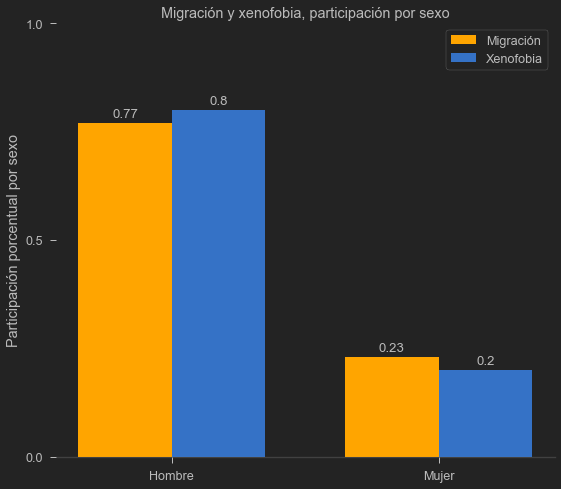

In [33]:
fig, ax = plt.subplots()
x = np.arange(len(tabla['Sexo']))  # the label locationss
width = 0.35  # the width of the bars
bar1 = ax.bar(x - width/2, tabla['General'], color = 'orange', width=width, label = 'Migración')
bar2 = ax.bar(x + width/2, tabla['Xenofobia'], color = mcolors.CSS4_COLORS.get('darkgoldenroot'), width=width, label = 'Xenofobia')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Participación porcentual por sexo')
yticks = pd.Series([0,0.5,1])
ax.set_yticks(yticks)
ax.set_title('Migración y xenofobia, participación por sexo')
ax.set_xticks(x)
ax.set_xticklabels(tabla['Sexo'])
autolabel(bar1)
autolabel(bar2)
ax.legend()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

fig.tight_layout()
plt.show()

Done Educación
Done Integración
Done Salud
Done Seguridad
Done Trabajo
Done Xenofobia


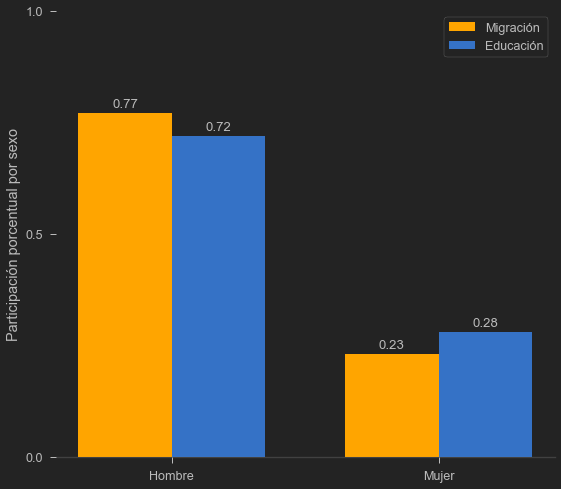

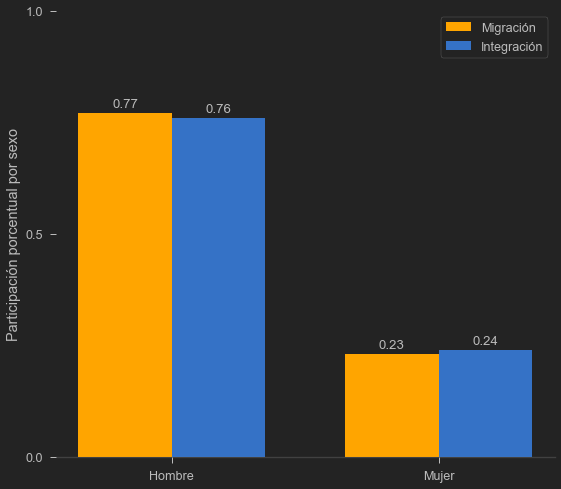

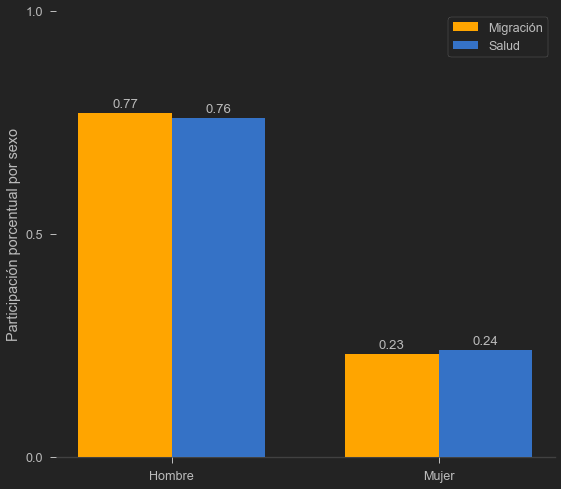

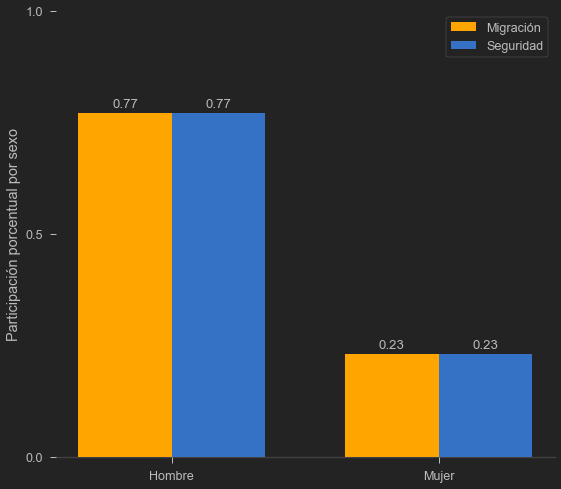

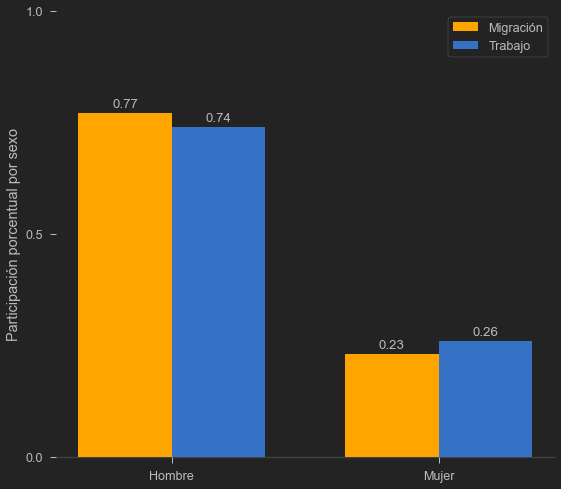

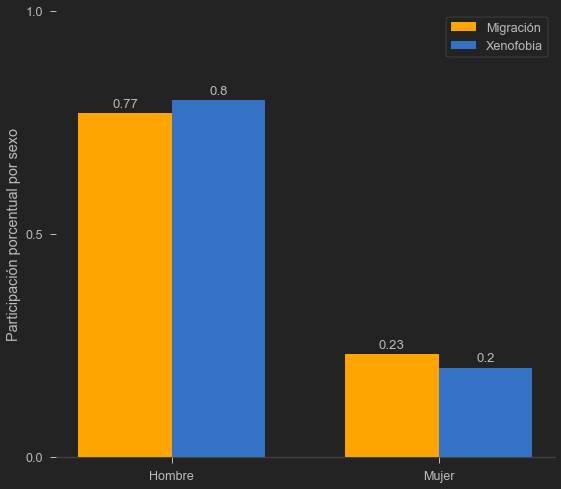

In [34]:
categorias =  ['Educación', 'Integración', 'Salud', 'Seguridad', 'Trabajo', 'Xenofobia']
for categoria in categorias:
    fig, ax = plt.subplots()
    x = np.arange(len(tabla['Sexo']))  # the label locationss
    width = 0.35  # the width of the bars
    bar1 = ax.bar(x - width/2, tabla['General'], color = 'orange', width=width, label = 'Migración')
    bar2 = ax.bar(x + width/2, tabla[categoria], color = mcolors.CSS4_COLORS.get('darkgoldenroot'), width=width, label = categoria)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Participación porcentual por sexo')
    yticks = pd.Series([0,0.5,1])
    ax.set_yticks(yticks)
    #ax.set_title('Migración y ' + categoria + ', participación por sexo')
    ax.set_xticks(x)
    ax.set_xticklabels(tabla['Sexo'])
    autolabel(bar1)
    autolabel(bar2)
    ax.legend()
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_alpha(0.3)

    fig.tight_layout()
    plt.savefig( categoria + '.png',dpi=400)
    print('Done ' + categoria)

In [16]:
tabla.to_excel("Tabla_sexos.xlsx")